In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df_1619 = pd.read_csv('data_after_fe1/20162019_clean.csv')

In [3]:
# only keep the rows whose eventType is "SHOT" or "GOAL"
df_1619_shot_goal = df_1619[(df_1619['eventTypeId'] == 'SHOT') | (df_1619['eventTypeId'] == 'GOAL')]
# only keep the rows whose "distance" and "angle" are not null
df_1619_shot_goal_distance_speed = df_1619_shot_goal[(~df_1619_shot_goal.distance.isna()) & (~df_1619_shot_goal.angle.isna())]
# only keep the rows whose "distance" is not "shoot out"
df_clean = df_1619_shot_goal_distance_speed[df_1619_shot_goal_distance_speed['distance']!='shoot out']

In [4]:
df_no_goals = df_clean[df_clean.eventTypeId == "SHOT"]
df_goals = df_clean[df_clean.eventTypeId == "GOAL"]

In [5]:
distances_no_goals = df_no_goals.distance.astype(float)
bins_distance = [x for x in range(0,201,10)]
bin_centers_distance = [x for x in range(5,196,5)]
categories_distance_no_goals = pd.cut(distances_no_goals, bins=bins_distance, right=False) 
bin_counts_distance_no_goals = pd.Series(categories_distance_no_goals).value_counts().reset_index()
current_column_names_distance_no_goals = bin_counts_distance_no_goals.columns
current_column_names_distance_no_goals.values[0] = 'interval'
current_column_names_distance_no_goals.values[1] = 'count'
bin_counts_distance_no_goals.columns = current_column_names_distance_no_goals

In [6]:
bin_center_no_goal_distance = []
for i in range(len(bin_counts_distance_no_goals)):
    bin_center_no_goal_distance.append((bin_counts_distance_no_goals.iloc[i].interval.left+bin_counts_distance_no_goals.iloc[i].interval.right)//2)

In [7]:
distances_goals = df_goals.distance.astype(float)
bins_distance = [x for x in range(0,201,10)]
bin_centers_distance = [x for x in range(5,196,5)]
categories_distance_goals = pd.cut(distances_goals, bins=bins_distance, right=False) 
bin_counts_distance_goals = pd.Series(categories_distance_goals).value_counts().reset_index()
current_column_names_distance_goals = bin_counts_distance_goals.columns
current_column_names_distance_goals.values[0] = 'interval'
current_column_names_distance_goals.values[1] = 'count'
bin_counts_distance_goals.columns = current_column_names_distance_goals

In [8]:
bin_center_goal_distance = []
for i in range(len(bin_counts_distance_goals)):
    bin_center_goal_distance.append((bin_counts_distance_goals.iloc[i].interval.left+bin_counts_distance_goals.iloc[i].interval.right)//2)

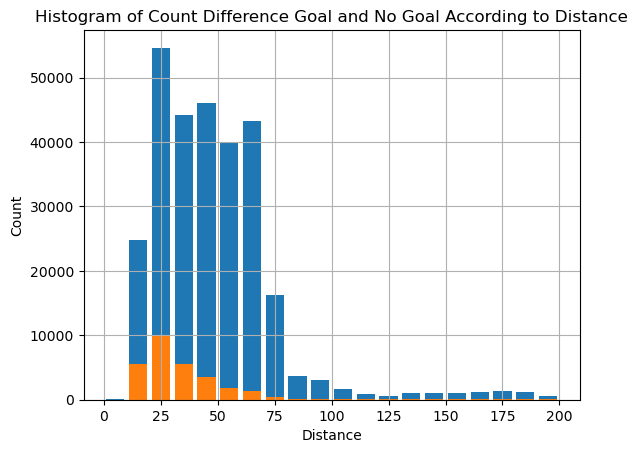

In [9]:
plt.bar(bin_center_no_goal_distance, bin_counts_distance_no_goals['count'], width=8)
plt.bar(bin_center_goal_distance, bin_counts_distance_goals['count'], width=8)
plt.xlabel('Distance')
plt.ylabel('Count')
plt.title('Histogram of Count Difference Goal and No Goal According to Distance')
plt.grid(True)
plt.show()

In [10]:
angle_no_goals = df_no_goals.angle.astype(float)
bins_angle = [x for x in range(0,91,10)]
bin_centers_angle = [x for x in range(5,86,5)]
categories_angle_no_goals = pd.cut(angle_no_goals, bins=bins_angle, right=False) 
bin_counts_angle_no_goals = pd.Series(categories_angle_no_goals).value_counts().reset_index()
current_column_names_angle_no_goals = bin_counts_angle_no_goals.columns
current_column_names_angle_no_goals.values[0] = 'interval'
current_column_names_angle_no_goals.values[1] = 'count'
bin_counts_angle_no_goals.columns = current_column_names_angle_no_goals

In [11]:
bin_center_no_goal_angle = []
for i in range(len(bin_counts_angle_no_goals)):
    bin_center_no_goal_angle.append((bin_counts_angle_no_goals.iloc[i].interval.left+bin_counts_angle_no_goals.iloc[i].interval.right)//2)

In [12]:
angle_goals = df_goals.angle.astype(float)
bins_angle = [x for x in range(0,91,10)]
bin_centers_angle = [x for x in range(5,86,5)]
categories_angle_goals = pd.cut(angle_goals, bins=bins_angle, right=False) 
bin_counts_angle_goals = pd.Series(categories_angle_goals).value_counts().reset_index()
current_column_names_angle_goals = bin_counts_angle_goals.columns
current_column_names_angle_goals.values[0] = 'interval'
current_column_names_angle_goals.values[1] = 'count'
bin_counts_angle_goals.columns = current_column_names_angle_goals

In [13]:
bin_center_goal_angle = []
for i in range(len(bin_counts_angle_goals)):
    bin_center_goal_angle.append((bin_counts_angle_goals.iloc[i].interval.left+bin_counts_angle_goals.iloc[i].interval.right)//2)

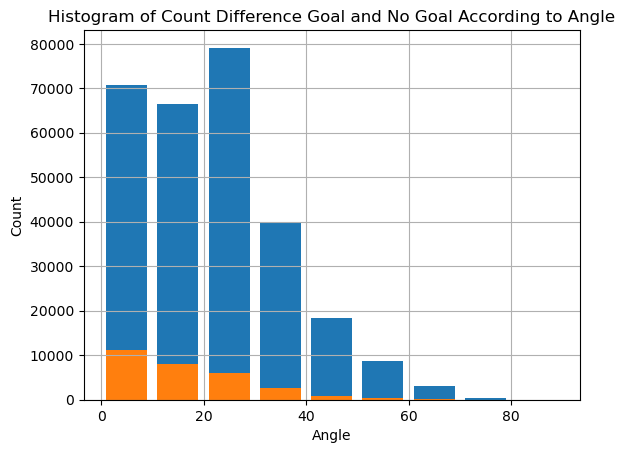

In [14]:
plt.bar(bin_center_no_goal_angle, bin_counts_angle_no_goals['count'], width=8)
plt.bar(bin_center_goal_angle, bin_counts_angle_goals['count'], width=8)
plt.xlabel('Angle')
plt.ylabel('Count')
plt.title('Histogram of Count Difference Goal and No Goal According to Angle')
plt.grid(True)
plt.show()

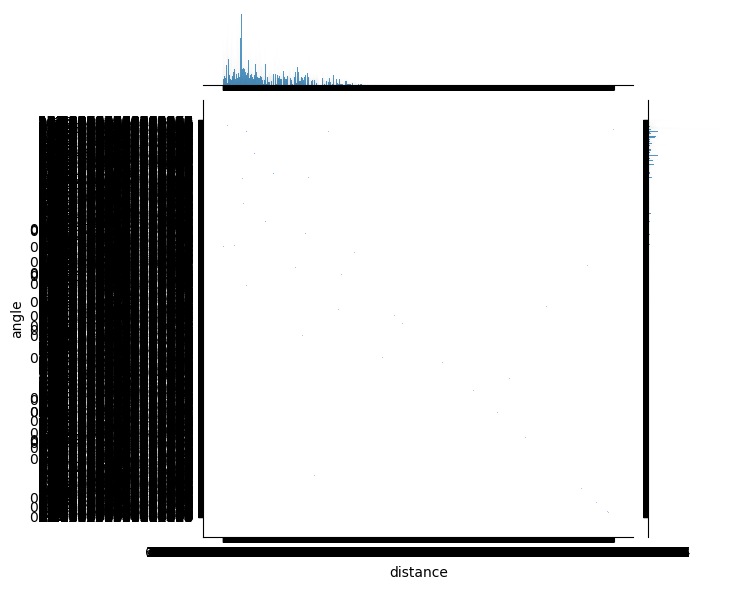

In [28]:
sns.jointplot(x=df_clean.distance, y=df_clean.angle, kind='hist');

In [16]:
distance_all_shot = df_clean.distance.astype(float)
bins_distance_all_shot = [x for x in range(0,201,10)]
categories_distance_all_shot = pd.cut(distance_all_shot, bins=bins_distance_all_shot, right=False) 
df_bins_count_all_shot = pd.Series(categories_distance_all_shot).value_counts().reset_index()
current_column_names_all_shot = df_bins_count_all_shot.columns
current_column_names_all_shot.values[0] = 'interval'
current_column_names_all_shot.values[1] = 'count'
df_bins_count_all_shot.columns = current_column_names_all_shot

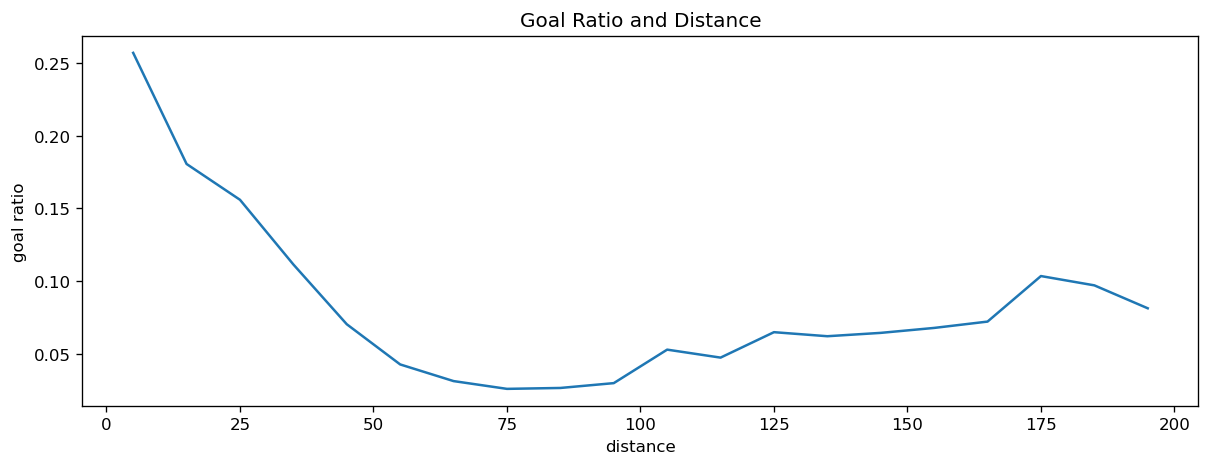

In [17]:
goal_ratio = []
intervals = []
bin_centers = []
for i in range(len(bin_counts_distance_goals)):
    for j in range(len(df_bins_count_all_shot)):
        if bin_counts_distance_goals.iloc[i].interval == df_bins_count_all_shot.iloc[j].interval:
            intervals.append(bin_counts_distance_goals.iloc[i].interval)
            goal_ratio.append(bin_counts_distance_goals.iloc[i]["count"]/df_bins_count_all_shot.iloc[j]["count"])
            bin_centers.append((bin_counts_distance_goals.iloc[i].interval.left+bin_counts_distance_goals.iloc[i].interval.right)//2)
            break
df_goal_ratio = pd.DataFrame({'interval': intervals, 'goal ratio': goal_ratio, 'distance': bin_centers})
fig, ax = plt.subplots(figsize=(12, 4), dpi=120)
sns.lineplot(data=df_goal_ratio, x="distance", y="goal ratio")
plt.title("Goal Ratio and Distance")
plt.show()

In [18]:
angle_all_shot = df_clean.angle.astype(float)
bins_angle_all_shot = [x for x in range(0,201,10)]
categories_angle_all_shot = pd.cut(angle_all_shot, bins=bins_angle_all_shot, right=False) 
df_bins_count_all_shot_angle = pd.Series(categories_angle_all_shot).value_counts().reset_index()
current_column_names_all_shot_angle = df_bins_count_all_shot_angle.columns
current_column_names_all_shot_angle.values[0] = 'interval'
current_column_names_all_shot_angle.values[1] = 'count'
df_bins_count_all_shot_angle.columns = current_column_names_all_shot_angle

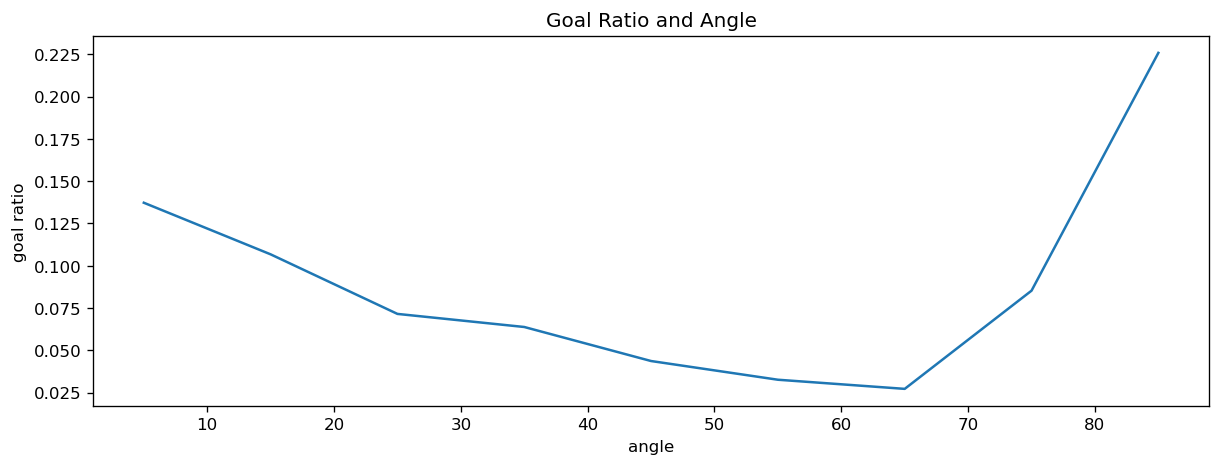

In [19]:
goal_ratio = []
intervals = []
bin_centers = []
for i in range(len(bin_counts_angle_goals)):
    for j in range(len(df_bins_count_all_shot_angle)):
        if bin_counts_angle_goals.iloc[i].interval == df_bins_count_all_shot_angle.iloc[j].interval:
            intervals.append(bin_counts_angle_goals.iloc[i].interval)
            goal_ratio.append(bin_counts_angle_goals.iloc[i]["count"]/df_bins_count_all_shot_angle.iloc[j]["count"])
            bin_centers.append((bin_counts_angle_goals.iloc[i].interval.left+bin_counts_angle_goals.iloc[i].interval.right)//2)
            break
df_goal_ratio = pd.DataFrame({'interval': intervals, 'goal ratio': goal_ratio, 'angle': bin_centers})
fig, ax = plt.subplots(figsize=(12, 4), dpi=120)
sns.lineplot(data=df_goal_ratio, x="angle", y="goal ratio")
plt.title("Goal Ratio and Angle")
plt.show()

In [20]:
df_goals = df_clean[df_clean.eventTypeId == "GOAL"]
df_goals_empty = df_goals[df_goals.emptyNet == 1]
df_goals_non_empty = df_goals[df_goals.emptyNet == 0]

In [21]:
distances_goals_non_empty = df_goals_non_empty.distance.astype(float)
bins_distance = [x for x in range(0,201,10)]
categories_distances_goals_non_empty = pd.cut(distances_goals_non_empty, bins=bins_distance, right=False) 
bin_counts_distances_goals_non_empty = pd.Series(categories_distances_goals_non_empty).value_counts().reset_index()
current_column_names_distances_goals_non_empty = bin_counts_distances_goals_non_empty.columns
current_column_names_distances_goals_non_empty.values[0] = 'interval'
current_column_names_distances_goals_non_empty.values[1] = 'count'
bin_counts_distances_goals_non_empty.columns = current_column_names_distances_goals_non_empty

In [22]:
bin_center_goal_non_empty = []
for i in range(len(bin_counts_distances_goals_non_empty)):
    bin_center_goal_non_empty.append((bin_counts_distances_goals_non_empty.iloc[i].interval.left+bin_counts_distances_goals_non_empty.iloc[i].interval.right)//2)

In [23]:
distances_goals_empty = df_goals_empty.distance.astype(float)
bins_distance = [x for x in range(0,201,10)]
categories_distance_goals_empty = pd.cut(distances_goals_empty, bins=bins_distance, right=False) 
bin_counts_distance_goals_empty = pd.Series(categories_distance_goals_empty).value_counts().reset_index()
current_column_names_distance_goals_empty = bin_counts_distance_goals_empty.columns
current_column_names_distance_goals_empty.values[0] = 'interval'
current_column_names_distance_goals_empty.values[1] = 'count'
bin_counts_distance_goals_empty.columns = current_column_names_distance_goals_empty

In [24]:
bin_center_goal_empty = []
for i in range(len(bin_counts_distance_goals_empty)):
    bin_center_goal_empty.append((bin_counts_distance_goals_empty.iloc[i].interval.left+bin_counts_distance_goals_empty.iloc[i].interval.right)//2)

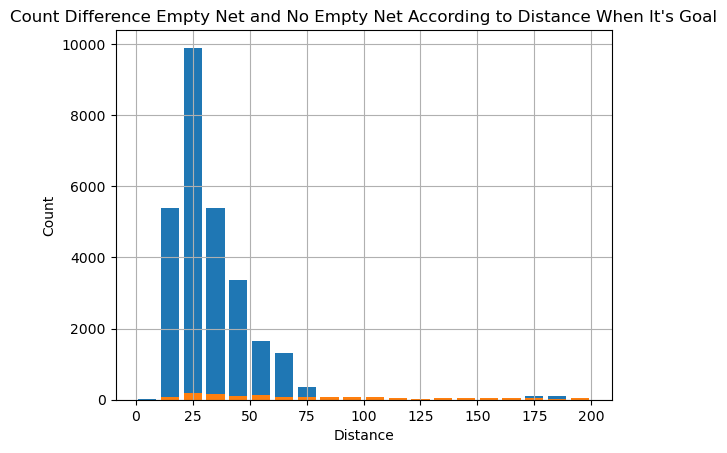

In [29]:
plt.bar(bin_center_goal_non_empty, bin_counts_distances_goals_non_empty['count'], width=8)
plt.bar(bin_center_goal_empty, bin_counts_distance_goals_empty['count'], width=8)

plt.xlabel('Distance')
plt.ylabel('Count')
plt.title("Count Difference Empty Net and No Empty Net According to Distance When It's Goal")
plt.grid(True)
plt.show()